# Transforming workflow for coeanography study using S2 data, from SAFE to ZARR

This is a part of  notebook which we will show the example of transformation of research workflow using SAFE file format to new EOPF ZARR format. 


We use example from a repository https://github.com/cuevas-a97/S2_Codes , which shows the computation of oceanic current using S2L1C images. 

To understand the scientific background of this notebook, please reffer to https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JC012425

This notebook  show the workflow using zarr format.  

All the research sofware that was used in https://github.com/cuevas-a97/S2_Codes, can also be omitted since the new zarr product already can load necessary data with the functionality available from EOPF zarr format.  

You can test this notebook using following docker image

``` 
docker.io/tinaok/eopf-webiner6-docker:latest
```



## Access the Analysisi Ready Clowed Optimised EOPF ZARR  file
### Import dependencies accessing the  EOPF ZARR format. 

It is very easy. I used EOPF Sample service example notebook and just copied pasted some cells. 
https://eopf-sample-service.github.io/eopf-sample-notebooks/stac-eopf-zarr-sentinel



In [1]:
#import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pystac_client
import xarray as xr
from pystac_client import CollectionSearch
#from matplotlib.gridspec import GridSpec
import hvplot.xarray
import pandas as pd
import matplotlib.patches as patches
import holoviews as hv


### Use pystac client and connect to the eopf zarr data

In [2]:
#lets try to specify 'ocean' point and see if we have any specific metadta to collect 'ocean' parts from stac catalog,

catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
LON, LAT = -4.5, 48

date = "2025-07-07/2025-07-11"
date = "2025-06-17/2025-06-17"

collections=['sentinel-2-l1c']
collections=['sentinel-2-l1c','sentinel-2-l2a']
# Search with cloud cover filter
items = list(
    catalog.search(
        datetime=date,
        collections=collections,
    intersects=dict(type="Point", coordinates=[LON, LAT]),
        query={
            "eo:cloud_cover": {"lt": 20},
            "view:sun_elevation": {"lt": 27},
        },
    ).items()
)

for item in items:
        print(f"✅ {item.id}")


✅ S2B_MSIL2A_20250617T112109_N0511_R037_T30UUU_20250617T133829
✅ S2B_MSIL1C_20250617T112109_N0511_R037_T30UUU_20250617T131418


### Opening the L2A data in lazy xarray format using eopf xarray backend.  

In [3]:
item = items[0]  # extracting the first item

l2a = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.persist()    
l2a

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'kerchunk' loading failed:
No module named 'zarr.core.array_spec'; 'zarr.core' is not a package
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)


<xarray.Dataset> Size: 9GB
Dimensions:                                            (
                                                        conditions_geometry_angle: 2,
                                                        conditions_geometry_band: 13,
                                                        conditions_geometry_y: 23,
                                                        conditions_geometry_x: 23,
                                                        conditions_geometry_detector: 7,
                                                        ...
                                                        quality_mask_r20m_y: 5490,
                                                        quality_mask_r20m_x: 5490,
                                                        quality_mask_r60m_y: 1830,
                                                        quality_mask_r60m_x: 1830,
                                                        quality_probability_y: 5490,
                                                        quality_probability_x: 5490)
Coordinates: (12/63)
  * conditions_geometry_angle                          (conditions_geometry_angle) <U7 56B ...
  * conditions_geometry_band                           (conditions_geometry_band) <U3 156B ...
  * conditions_geometry_detector                       (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                              (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                              (conditions_geometry_y) int64 184B ...
  * conditions_mask_detector_footprint_r10m_x          (conditions_mask_detector_footprint_r10m_x) int64 88kB ...
    ...                                                 ...
  * quality_mask_r20m_y                                (quality_mask_r20m_y) int64 44kB ...
  * quality_mask_r60m_x                                (quality_mask_r60m_x) int64 15kB ...
  * quality_mask_r60m_y                                (quality_mask_r60m_y) int64 15kB ...
    quality_probability_band                           int64 8B ...
  * quality_probability_x                              (quality_probability_x) int64 44kB ...
  * quality_probability_y                              (quality_probability_y) int64 44kB ...
Data variables: (12/86)
    conditions_geometry_mean_sun_angles                (conditions_geometry_angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions_geometry_mean_viewing_incidence_angles  (conditions_geometry_band, conditions_geometry_angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions_geometry_sun_angles                     (conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions_geometry_viewing_incidence_angles       (conditions_geometry_band, conditions_geometry_detector, conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b02        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b03        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    ...                                                 ...
    quality_mask_r20m_b8a                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r60m_b01                              (quality_mask_r60m_y, quality_mask_r60m_x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    quality_mask_r60m_b09                              (quality_mask_r60m_y, quality_mask_r60m_x) uint8 3MB dask.array<chunksize=(1830, 1830), me

### Opening the L1C data in  xarray format using eopf xarray backend

In [4]:
item = items[1]  # extracting the first item

l1c = xr.open_datatree(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.compute()  
l1c

<xarray.DataTree>
Group: /
│   Attributes: (3)
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 7)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 56B 3 4 5 6 7 8 9
│   │         * x                              (x) int64 184B 300000 305000 ... 410000
│   │         * y                              (y) int64 184B 5400000 5395000 ... 5290000
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 300005 300015 300025 300035 ... 409775 409785 409795
│   │   │   │         * y        (y) int64 88kB 5399995 5399985 5399975 ... 5290225 5290215 5290205
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 300010 300030 300050 300070 ... 409750 409770 409790
│   │   │   │         * y        (y) int64 44kB 5399990 5399970 5399950 ... 5290250 5290230 5290210
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 300030 300090 300150 300210 ... 409650 409710 409770
│   │   │             * y        (y) int64 15kB 5399970 5399910 5399850 ... 5290350 5290290 5290230
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b10      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   └── Group: /conditions/mask/l1c_classification
│   │       └── Group: /conditions/mask/l1c_classification/r60m
│   │               Dimensions:  (y: 1830, x: 18

In [5]:
bands=l1c['conditions']['geometry'].band.values 
for band in bands:
    print('band',band,'onboard_integration_time' ,
    l1c.attrs['other_metadata']['band_description'][band]['onboard_integration_time']
         )
l1c.attrs['other_metadata']['band_description']['b01']
#l1c.attrs['other_metadata']['band_description']

band b01 onboard_integration_time 7.22833
band b02 onboard_integration_time 1.2646269
band b03 onboard_integration_time 1.2996743
band b04 onboard_integration_time 1.3405629
band b05 onboard_integration_time 2.7846026
band b06 onboard_integration_time 2.7727115
band b07 onboard_integration_time 2.7727115
band b08 onboard_integration_time 1.3872929
band b8a onboard_integration_time 2.7608204
band b09 onboard_integration_time 8.031501
band b10 onboard_integration_time 5.5537686
band b11 onboard_integration_time 1.3793689
band b12 onboard_integration_time 1.4761667


{'bandwidth': 20.0,
 'central_wavelength': 442.3,
 'onboard_compression_rate': '2.655',
 'onboard_integration_time': '7.22833',
 'physical_gain': '3.958028',
 'spectral_response_step': '1',
 'spectral_response_values': '0.0062411 0.01024045 0.00402983 0.00642179 0.00552753 0.0065525 0.00409887 0.006297 0.00436742 0.00233356 0.00058162 0.00202276 0.00294328 0.00485362 0.00317041 0.00237657 0.00234612 0.00440152 0.01292397 0.05001678 0.18650104 0.45441623 0.72307877 0.83999211 0.86456334 0.87472096 0.89215296 0.91090814 0.92588017 0.93924094 0.94491826 0.95078529 0.96803023 0.99939195 1 0.97548364 0.96148351 0.94986211 0.91841452 0.87989802 0.80383677 0.59752075 0.30474132 0.10798014 0.0304465 0.00885119',
 'units': 'nm',
 'wavelength_max': 456.0,
 'wavelength_min': 411.0}

In [6]:


# 属性データを取り出し
band_description = l1c.attrs['other_metadata']['band_description']

# 全バンドのデータをまとめるリスト
band_data = []

# 各バンドを順次処理
for band, desc in band_description.items():
    # spectral_response_valuesを数値のリストに変換
#    spectral_response_values = np.array(
#        [float(v) for v in desc.get('spectral_response_values', '').split()]
#    ) if 'spectral_response_values' in desc else None

    step_raw = desc.get('spectral_response_step', None)
    step_val = int(step_raw) if step_raw is not None else np.nan

    # 各バンドの辞書を作成
    band_info = {
        'band': band,
        'bandwidth': float(desc.get('bandwidth', np.nan)),
        'central_wavelength': float(desc.get('central_wavelength', np.nan)),
        'onboard_compression_rate': float(desc.get('onboard_compression_rate', np.nan)),
        'onboard_integration_time_ms': float(desc.get('onboard_integration_time', np.nan)),
        'physical_gain': float(desc.get('physical_gain', np.nan)),
        'spectral_response_step': step_val,
        'units': desc.get('units', ''),
        'wavelength_max': float(desc.get('wavelength_max', np.nan)),
        'wavelength_min': float(desc.get('wavelength_min', np.nan)),
#        'spectral_response_values': spectral_response_values
    }

    band_data.append(band_info)

# spectral_response_valuesは可変長配列のため、まずそれ以外の情報をDataFrame化
band_df = pd.DataFrame(band_data).set_index('band')

# xarray Datasetに変換（可変長以外）
l1c_band_info = xr.Dataset.from_dataframe(
    band_df#.drop(columns=['spectral_response_values'])
)

# spectral_response_values を個別に追加
#for band, data in zip(band_df.index, band_df.spectral_response_values):
#    if data is not None:
#        l1c_band_info['spectral_response_values_'+band] = xr.DataArray(
#            data, dims=['spectral_response_step']
#        )

# 結果を表示
l1c_band_info

<xarray.Dataset> Size: 2kB
Dimensions:                      (band: 26)
Coordinates:
  * band                         (band) object 208B '01' '02' ... 'b12' 'b8a'
Data variables:
    bandwidth                    (band) float64 208B 20.0 65.0 ... 180.0 20.0
    central_wavelength           (band) float64 208B nan nan ... 2.186e+03 864.0
    onboard_compression_rate     (band) float64 208B 2.655 2.97 ... 2.4 2.655
    onboard_integration_time_ms  (band) float64 208B 7.228 1.265 ... 1.476 2.761
    physical_gain                (band) float64 208B nan nan nan ... 108.7 5.761
    spectral_response_step       (band) float64 208B nan nan nan ... 1.0 1.0 1.0
    units                        (band) object 208B 'nm' 'nm' 'nm' ... 'nm' 'nm'
    wavelength_max               (band) float64 208B nan nan ... 2.303e+03 880.0
    wavelength_min               (band) float64 208B nan nan ... 2.065e+03 848.0

### Plot required values for the scientific workflow
It is required to have B02, B04, detector information, sun_angles, viewing_incidentce_angles, coordinate (longitude and latitude) are required for this scientific workflow.

As showin in the above l1c datset, this corresponds to following dataarray in L1c
- measurements_r10m_b02 (measurements_r10m_y: 10980, measurements_r10m_x: 10980)
l1c['measurements']['reflectance']['r10m'] 'b02'y: 10980x: 10980
- measurements_r10m_b04 (measurements_r10m_y: 10980, measurements_r10m_x: 10980)
l1c['measurements']['reflectance']['r10m'] 'b04'y: 10980x: 10980

- conditions_geometry_sun_angles (conditions_geometry_angle: 2, conditions_geometry_y: 23conditions_geometry_x: 23)
l1c['conditions']['geometry']['sun_angles']  angle: 2y: 23x: 23

- conditions_geometry_viewing_incidence_angles (conditions_geometry_band: 13, conditions_geometry_detector: 7, conditions_geometry_angle: 2, conditions_geometry_y: 23, conditions_geometry_x: 23)
l1c['conditions']['geometry']['viewing_incidence_angles']  'viewing_incidence_angles'band: 13detector: 7angle: 2y: 23x: 23

- conditions_mask_detector_footprint_r10m_b02 (conditions_mask_detector_footprint_r10m_y: 10980, conditions_mask_detector_footprint_r10m_x: 10980)
- conditions_mask_detector_footprint_r10m_b04 (conditions_mask_detector_footprint_r10m_y: 10980, conditions_mask_detector_footprint_r10m_x: 10980)
l1c['conditions']['mask']['detector_footprint']['r10m']  
y: 10980x: 10980



In [7]:
(
    l1c['conditions']['geometry']['sun_angles'].hvplot(
    x='x',y='y' )
+l1c['conditions']['geometry']['viewing_incidence_angles'].hvplot(
    x='x',y='y' 
)
)

:Layout
   .DynamicMap.I  :DynamicMap   [angle]
      :Image   [x,y]   (sun_angles)
   .DynamicMap.II :DynamicMap   [detector,band,angle]
      :Image   [x,y]   (viewing_incidence_angles)

## Start analysing the wave using Sun glitter imagery : Lets compute Part 1: Directional spectrum !

### First  chose area

:DynamicMap   []
   :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)
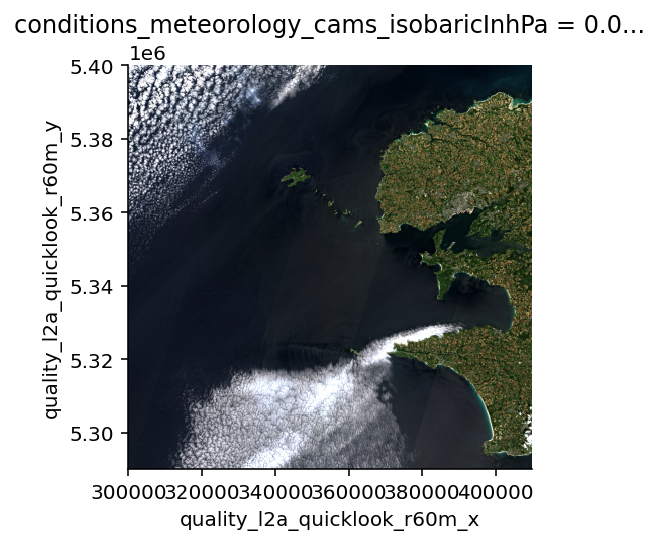

In [8]:
hvplot.extension('matplotlib')
#hvplot.extension('bokeh')

l2a_plot=l2a.quality_l2a_quicklook_r60m_tci.hvplot.rgb(x='quality_l2a_quicklook_r60m_x',
                                              y='quality_l2a_quicklook_r60m_y',
                                              bands='quality_l2a_quicklook_r60m_band',
                                              aspect='equal', 
                                              rasterize=True,
                                              datashader=True
                                             )
l2a_plot

### Compute radiance in advance, before cut of the region.

In [9]:
#define U:reflectance_correction_factor_from_the_Sun-Earth_distance_variation_computed_using_the_acquisition_date"


U: float =l1c.attrs["other_metadata"][
    "reflectance_correction_factor_from_the_Sun-Earth_distance_variation_computed_using_the_acquisition_date"
]

cos_sza_5km = np.cos(np.deg2rad(l1c['conditions']['geometry']['sun_angles'].sel(
    angle="zenith"
)))


# We will convert reflectances from band b02 to radiances
BAND: int = 2  # b02

# Band - 1 because Python list index starts at 0
solarIrradiance: float = np.float64(
    l1c.attrs["stac_discovery"]["properties"]["bands"][BAND - 1]["solar_illumination"]
)

reflectance_b02_10m = l1c['measurements']['reflectance']['r10m'].b02

#Interpolate sza on the angles grid to the 10m grid, 
#using the xarray .interp_like() method, 
#which interpolates our input data to match the given target.
    
cos_sza_10m: xr.DataArray = cos_sza_5km.interp_like(reflectance_b02_10m)
#For simplicity, radiance computation assume that reflectances equal numerical counts


radiance = reflectance_b02_10m * cos_sza_10m * solarIrradiance * U / np.pi
radiance

<xarray.DataArray (y: 10980, x: 10980)> Size: 964MB
dask.array<truediv, shape=(10980, 10980), dtype=float64, chunksize=(5490, 5490), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 88kB 300005 300015 300025 300035 ... 409775 409785 409795
  * y        (y) int64 88kB 5399995 5399985 5399975 ... 5290225 5290215 5290205
    angle    <U7 28B 'zenith'

### We chose an area

✅ : detector (6)


:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .RGB.I        :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)
         .Rectangles.I :Rectangles   [x0,y0,x1,y1]
   .DynamicMap.II :DynamicMap   []
      :Image   [x,y]   (TOA reflectance from MSI acquisition at spectral band b04 665.0 nm)
   .NdOverlay.I   :NdOverlay   [Variable]
      :Histogram   [b04]   (Count)
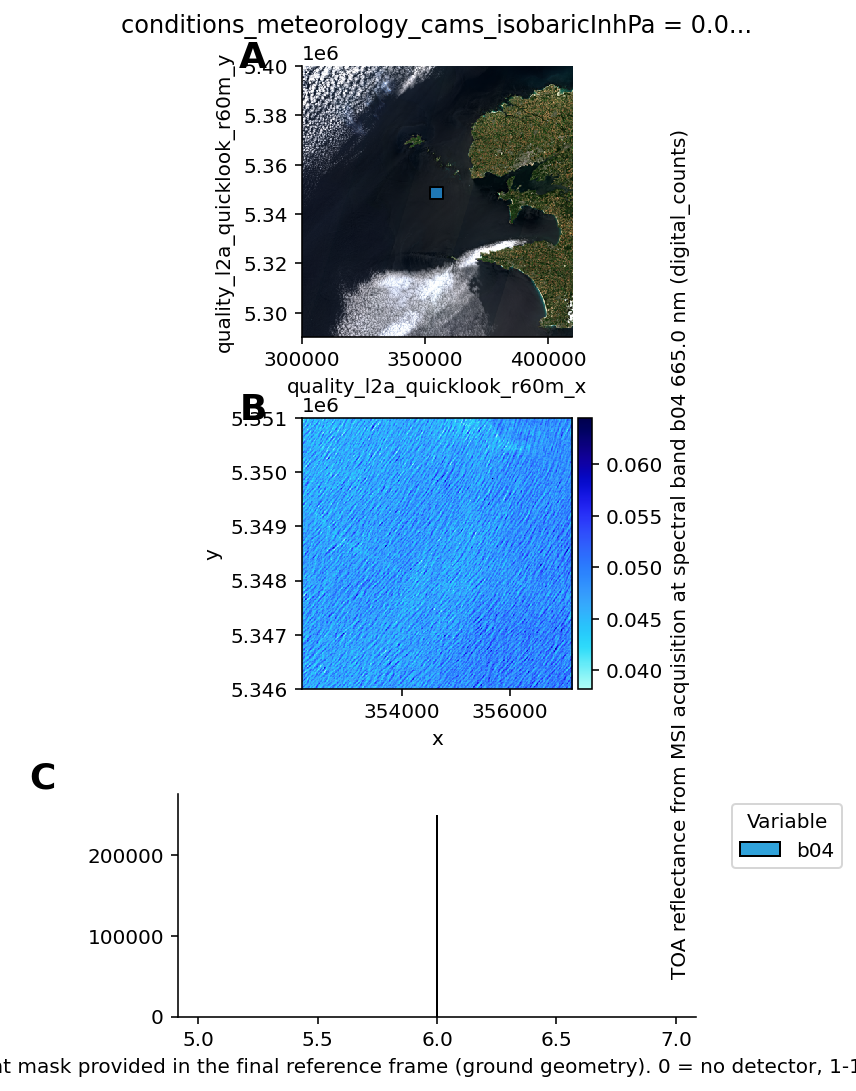

In [10]:
# 基本パラメータ
size=5000
minx= 352150#,351800,363600
miny= 5346000 #5355000, 5343000

#add ocean mask =6 and non cloud mas, and same detector mask so that the chose is helped automatically.
#
size = 5000
minx = 352150
miny = 5346000
maxx = minx + size
maxy = miny + size


# Box（線だけ）を描く：HoloViewsのRectanglesで (x0, y0, x1, y1)
box = hv.Rectangles([(minx, miny, maxx, maxy)]).opts(
    line_color='white',    # 線の色を白に明示
    line_width=1,
    fill_alpha=0           # 塗りつぶしは透明
)
#clip out l1c in the small area. 
l1c=l1c.sel(x=slice(minx,minx+size),y=slice(miny+size,miny)).persist()



b04=l1c['measurements']['reflectance']['r10m'].b04
b04_plot=b04.hvplot(x='x', y='y',
                                              aspect='equal', 
                                              rasterize=True,
                                              datashader=True
                                             )
b04_detector = l1c['conditions']['mask']['detector_footprint']['r10m']['b04'].astype(int)

b04_detector_plot = b04_detector.hvplot.hist()

detector = np.unique(b04_detector.values)

if len(detector) > 1:
    raise ValueError(f"b04_detector には複数のユニーク値が含まれています: {detector}")
else:
    print(f"✅ : detector ({detector[0]})")
    
hvplot.extension('matplotlib')
(l2a_plot * box +b04_plot +b04_detector_plot).cols(1)

sun angles [[[ 27.0145]]

 [[152.472 ]]]


:Curve   [band]   (onboard_integration_time_ms)
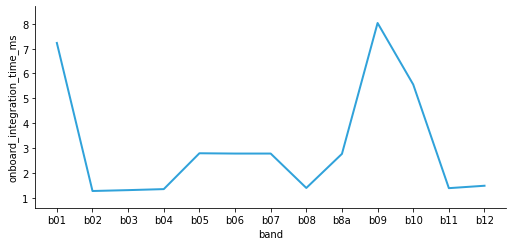

In [11]:
print('sun angles', l1c['conditions']['geometry']['sun_angles'].values)
#
#add here also the graph of onboard_integration_time for each bands
l1c_band_info.sel(band=bands)['onboard_integration_time_ms'].hvplot(x='band')  

In [12]:
hvplot.extension('bokeh')
l1c['conditions']['geometry']['viewing_incidence_angles'].sel(detector=detector).hvplot(x='band')

:DynamicMap   [y,x,detector,angle]
   :Curve   [band]   (viewing_incidence_angles)

In [13]:
#clip out other pre-analysed data here 
rad_b02=radiance.sel(x=slice(minx,minx+size),y=slice(miny+size,miny)).persist()


### Start computing the wave properties

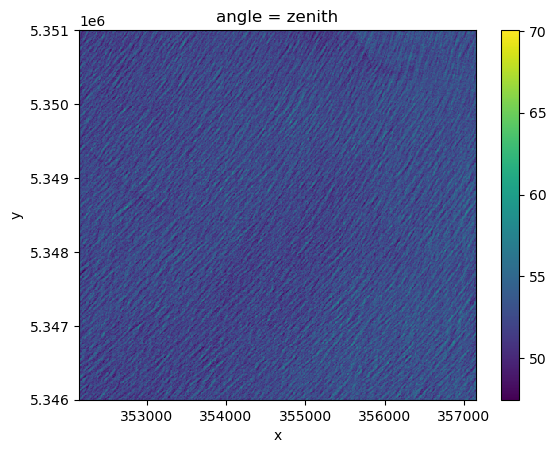

In [18]:
hvplot.extension('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

# 描画設定をリセット
plt.close('all')

import matplotlib.pyplot as plt

rad_b02.plot()


In [19]:
from scipy.ndimage import gaussian_filter

# 2. 平滑化（ガウシアンフィルター）
B = b04.values

sigma = 10  # 平滑化スケール
B_smooth = gaussian_filter(B, sigma=sigma)

# 3. 差分を計算
delta_B = B - B_smooth

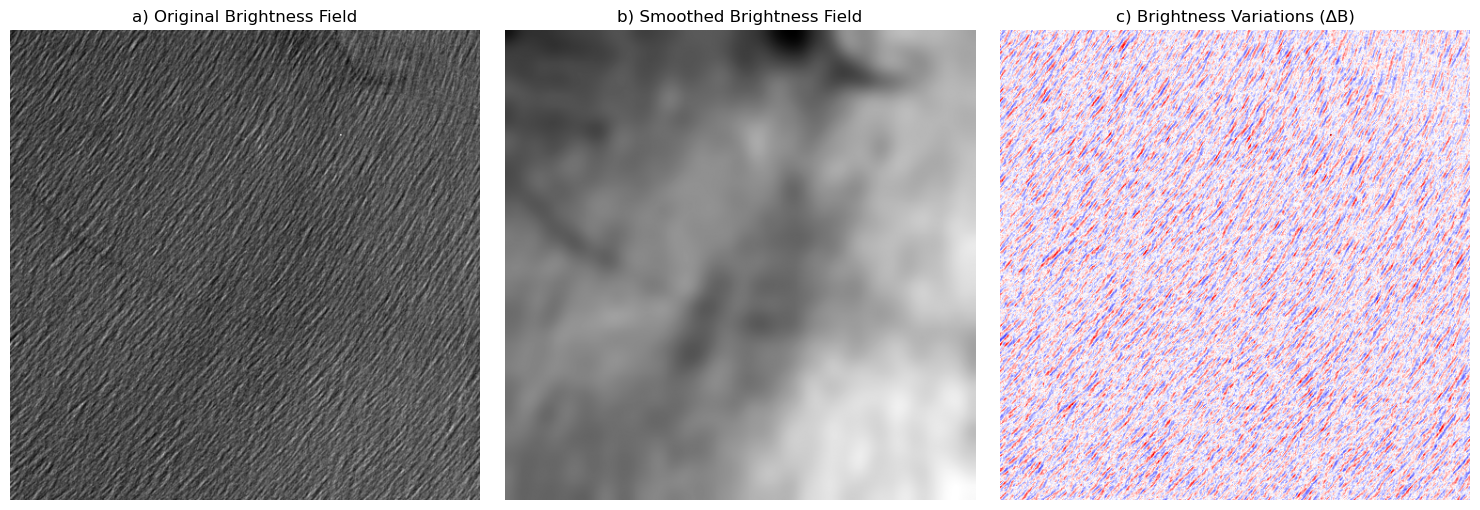

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(B, cmap='gray')
axs[0].set_title('a) Original Brightness Field')
axs[0].axis('off')

axs[1].imshow(B_smooth, cmap='gray')
axs[1].set_title('b) Smoothed Brightness Field')
axs[1].axis('off')

axs[2].imshow(delta_B, cmap='seismic', vmin=-np.max(np.abs(delta_B)), vmax=np.max(np.abs(delta_B)))
axs[2].set_title('c) Brightness Variations (ΔB)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

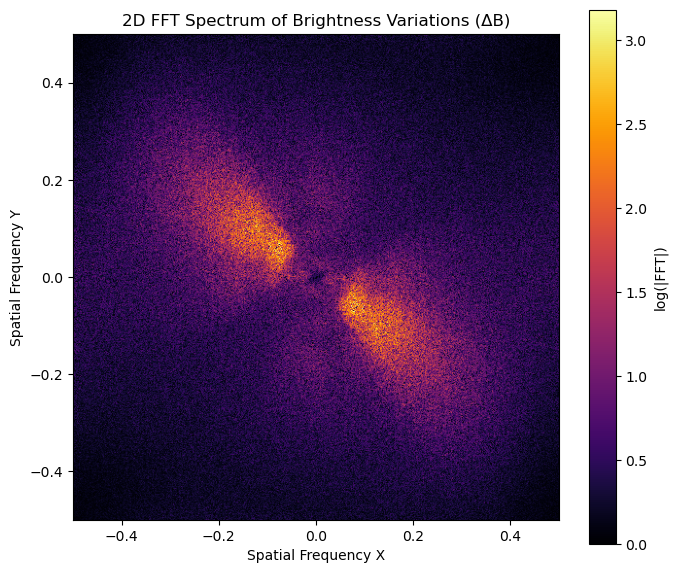

In [21]:
import numpy.fft as fft
import matplotlib.pyplot as plt

# 2次元FFTの実行
F = fft.fft2(delta_B)
F_shifted = fft.fftshift(F)  # ゼロ周波数を中心にシフト
magnitude_spectrum = np.abs(F_shifted)

# 対数スケールで視覚化（ダイナミックレンジを扱いやすくするため）
log_magnitude = np.log1p(magnitude_spectrum)

# プロット
plt.figure(figsize=(7, 6))
plt.imshow(log_magnitude, cmap='inferno', extent=[-0.5, 0.5, -0.5, 0.5])
plt.title('2D FFT Spectrum of Brightness Variations (ΔB)')
plt.xlabel('Spatial Frequency X')
plt.ylabel('Spatial Frequency Y')
plt.colorbar(label='log(|FFT|)')
plt.tight_layout()
plt.show()